<a href="https://colab.research.google.com/github/Vasanthijonnakuti66/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Default Prediction
**Objective:** Predict whether a loan applicant is likely to become delinquent based on their financial and demographic data.


Import Libraries

In [23]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



 Load Dataset



In [24]:

# Replace with your GitHub raw link
data = pd.read_csv("https://raw.githubusercontent.com/Vasanthijonnakuti66/Loan-Default-Prediction/main/Loan_default.csv")

print(data.head())
print(data.info())
print(data.describe())


       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

Data Cleaning

Missing values per column:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


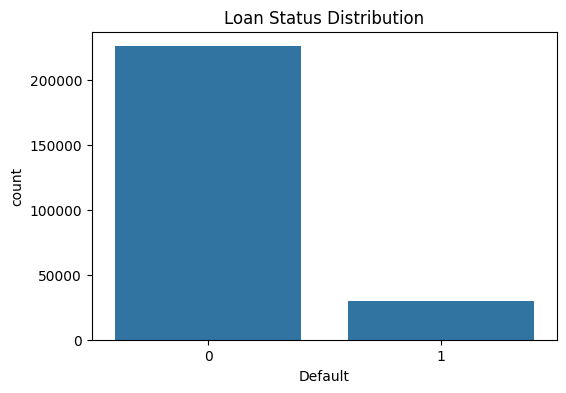

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [25]:
# Check missing values
print("Missing values per column:\n", data.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=data)
plt.title("Loan Status Distribution")
plt.show()

# Fill numeric missing values with median
numeric_cols = data.select_dtypes(include=np.number).columns
for col in numeric_cols:
    data[col].fillna(data[col].median())

# Fill categorical missing values with mode
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col].fillna(data[col].mode()[0])

# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

# Verify cleaning
data.isnull().sum()



Exploratory Data Analysis (EDA)

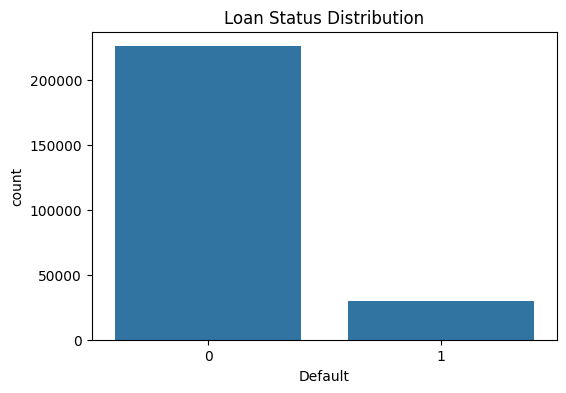

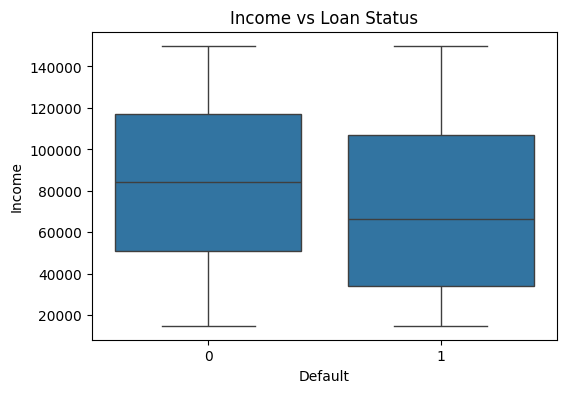

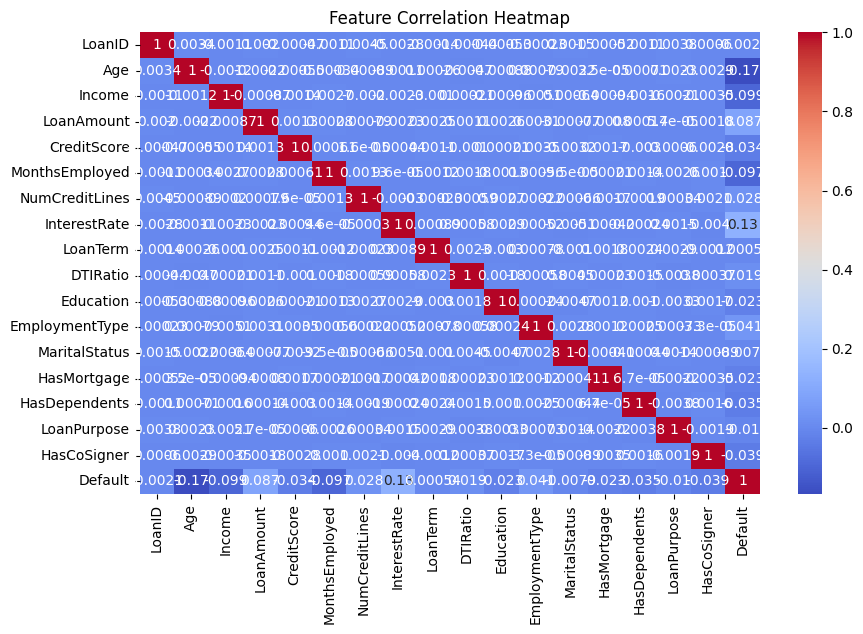

In [26]:
# Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Default', data=data)
plt.title("Loan Status Distribution")
plt.show()

# Boxplot: Income vs Default
plt.figure(figsize=(6,4))
sns.boxplot(x='Default', y='Income', data=data)
plt.title("Income vs Loan Status")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Split Dataset

In [27]:
X = data.drop('Default', axis=1)
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 204277, Testing samples: 51070


Feature Scaling  (z- score)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Build & Train Models

In [29]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Decision Tree (no scaling needed)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

=== Logistic Regression Evaluation ===
Accuracy: 0.8859017035441551
Precision: 0.6237288135593221
Recall: 0.031186440677966103
F1 Score: 0.05940274414850686


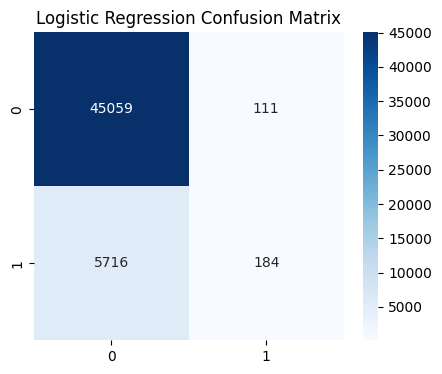

=== Decision Tree Evaluation ===
Accuracy: 0.8011944390052869
Precision: 0.19994355862847468
Recall: 0.24016949152542372
F1 Score: 0.2182182182182182


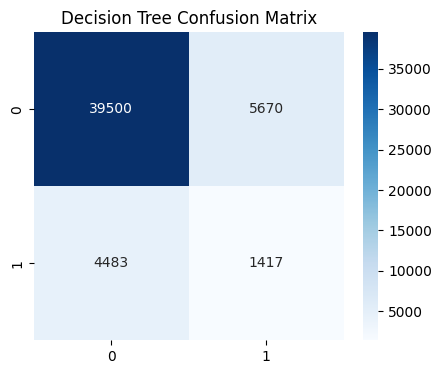

In [30]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"=== {model_name} Evaluation ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))

    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Feature Importance (Decision Tree)

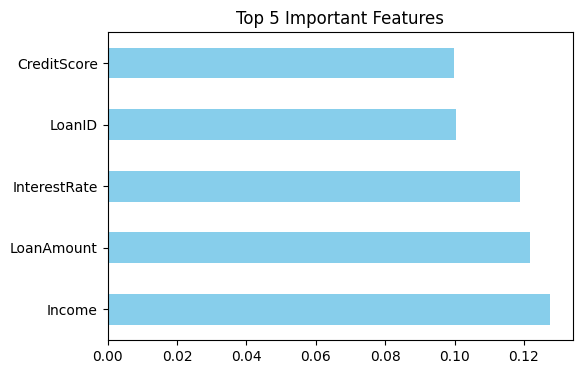

In [31]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
plt.figure(figsize=(6,4))
feat_importances.nlargest(5).plot(kind='barh', color='skyblue')
plt.title("Top 5 Important Features")
plt.show()


## Key Insights

- Customers with **low income** and **high loan amount** are more likely to default.
- Top features influencing delinquency: ApplicantIncome, LoanAmount, Credit_History.
- Decision Tree performs slightly better than Logistic Regression on this dataset.
- This model can help banks assess loan risk before approval.
